# Python control systems library

$$
\newcommand{\eg}{{\it e.g.}}
\newcommand{\ie}{{\it i.e.}}
\newcommand{\argmin}{\operatornamewithlimits{argmin}}
\newcommand{\mc}{\mathcal}
\newcommand{\mb}{\mathbb}
\newcommand{\mf}{\mathbf}
\newcommand{\minimize}{{\text{minimize}}}
\newcommand{\diag}{{\text{diag}}}
\newcommand{\cond}{{\text{cond}}}
\newcommand{\rank}{{\text{rank }}}
\newcommand{\range}{{\mathcal{R}}}
\newcommand{\null}{{\mathcal{N}}}
\newcommand{\tr}{{\text{trace}}}
\newcommand{\dom}{{\text{dom}}}
\newcommand{\dist}{{\text{dist}}}
\newcommand{\R}{\mathbf{R}}
\newcommand{\SM}{\mathbf{S}}
\newcommand{\ball}{\mathcal{B}}
\newcommand{\bmat}[1]{\begin{bmatrix}#1\end{bmatrix}}
$$

__<div style="text-align: right"> ASE3093: Automatic control, Inha University. </div>__
_<div style="text-align: right"> Jong-Han Kim (jonghank@inha.ac.kr) </div>_

This note provides a quick introduction to the python control systems library (https://python-control.readthedocs.io/en/0.9.3.post2/) developed by Richard Murray and his friends at California Institute of Technology (Caltech).

Installation is quite simple.

In [1]:
!pip install control

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 2.6 MB/s eta 0:00:00


Importing required modules.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from control.matlab import *

## Transfer functions

Linear systems can be created in a variety of ways. First by transfer functions. We are going to create

$$
  G(s) = \frac{1}{s+1}
$$

In [3]:
num1 = np.array([1])
den1 = np.array([1, 1])
G_1 = tf(num1, den1)
print(G_1)

<TransferFunction>: sys[0]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


  1
-----
s + 1



In [4]:
type(G_1)

control.xferfcn.TransferFunction

## Impulse response and step response

Step responses and impulse responses.

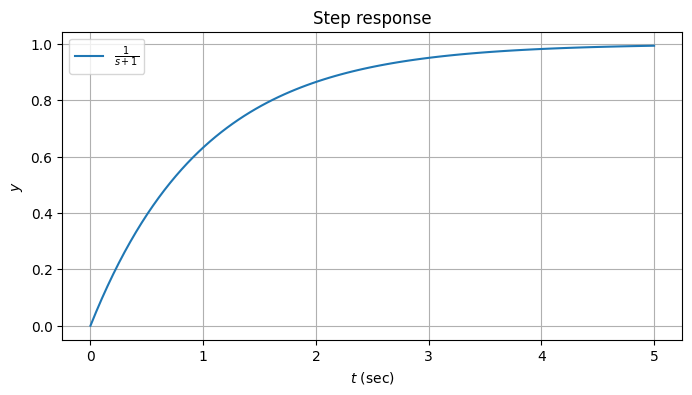

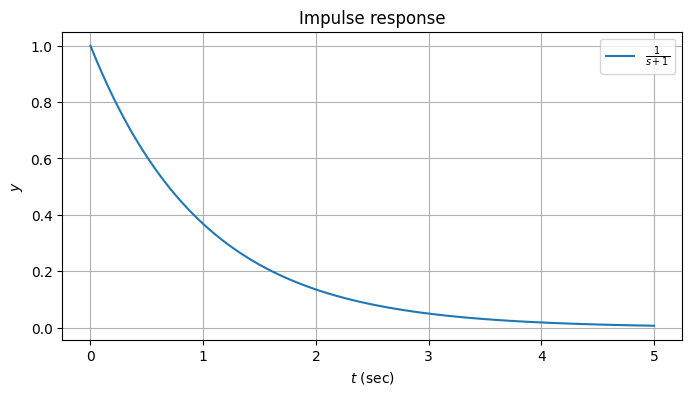

In [5]:
t = np.linspace(0, 5, 100)
y_1, t_1 = step(G_1, t)
y_1i, t_1i = impulse(G_1, t)

plt.figure(dpi=100, figsize=(8,4))
plt.plot(t_1, y_1, label=r'$\frac{1}{s+1}$')
plt.xlabel(r'$t$ (sec)')
plt.ylabel(r'$y$')
plt.title('Step response')
plt.legend()
plt.grid()
plt.show()

plt.figure(dpi=100, figsize=(8,4))
plt.plot(t_1i, y_1i, label=r'$\frac{1}{s+1}$')
plt.xlabel(r'$t$ (sec)')
plt.ylabel(r'$y$')
plt.title('Impulse response')
plt.legend()
plt.grid()
plt.show()

Comparing different bandwidth parameters and DC gains.

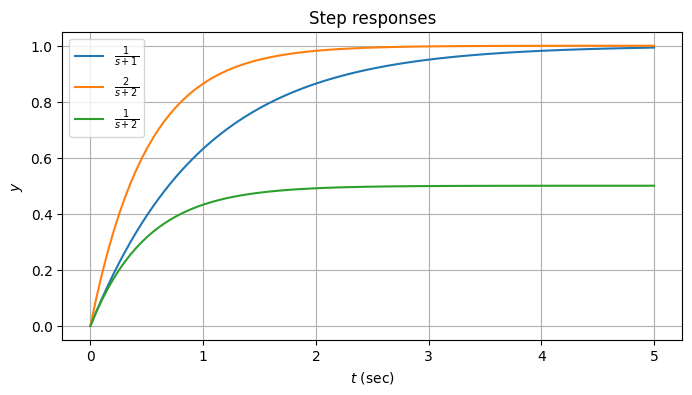

In [6]:
num2 = np.array([2])
den2 = np.array([1, 2])
G_2 = tf(num2, den2)

num3 = np.array([1])
den3 = np.array([1, 2])
G_3 = tf(num3, den3)

y_2, t_2 = step(G_2, t)
y_3, t_3 = step(G_3, t)

plt.figure(dpi=100, figsize=(8,4))
plt.plot(t_1, y_1, label=r'$\frac{1}{s+1}$')
plt.plot(t_2, y_2, label=r'$\frac{2}{s+2}$')
plt.plot(t_3, y_3, label=r'$\frac{1}{s+2}$')
plt.title('Step responses')
plt.xlabel(r'$t$ (sec)')
plt.ylabel(r'$y$')
plt.legend()
plt.grid()
plt.show()

## State-space descriptions

Linear systems can also be created by state-space descriptions. Let us first create a second order linear system in a transfer function form.

<TransferFunction>: sys[7]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


     1
-----------
s^2 + s + 1



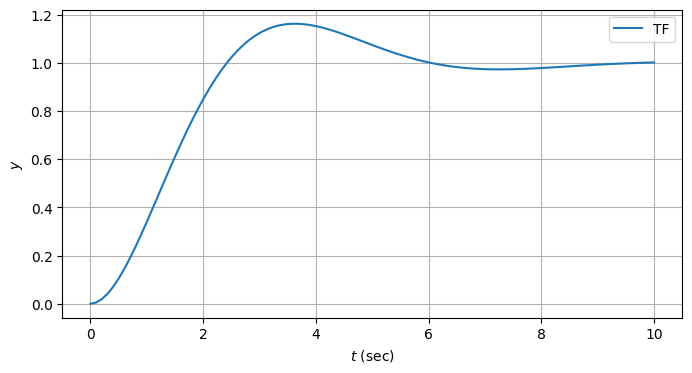

In [7]:
num = np.array([1])
den = np.array([1, 1, 1])
G_tf = tf(num, den)

print(G_tf)

t = np.linspace(0, 10, 100)

y_tf, t_tf = step(G_tf, t)

plt.figure(dpi=100, figsize=(8,4))
plt.plot(t_tf, y_tf, label='TF')
plt.xlabel(r'$t$ (sec)')
plt.ylabel(r'$y$')
plt.legend()
plt.grid()
plt.show()

So the transfer function was

$$
  G(s) = \frac{Y(s)}{U(s)} = \frac{1}{s^2 + s + 1}
$$

and the relevant differential equation is

$$
  \ddot{y} + \dot{y} + y = u
$$

which is equivalent to

\begin{align*}
  \dot{x} &= \bmat{-1 & -1 \\ 1 & 0} x + \bmat{1 \\ 0}u \\
  y &= \bmat{0 & 1}x
\end{align*}

with the state variable being $x = \bmat{\dot{y}^T & y^T}^T$.


In [8]:
A = np.array([[-1, -1], [1, 0]])
B = np.array([[1], [0]])
C = np.array([0, 1])
D = np.array([0])
G_ss = ss(A, B, C, D)

print (G_ss)

<StateSpace>: sys[9]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
States (2): ['x[0]', 'x[1]']

A = [[-1. -1.]
     [ 1.  0.]]

B = [[1.]
     [0.]]

C = [[0. 1.]]

D = [[0.]]



In [9]:
type(G_ss)

control.statesp.StateSpace

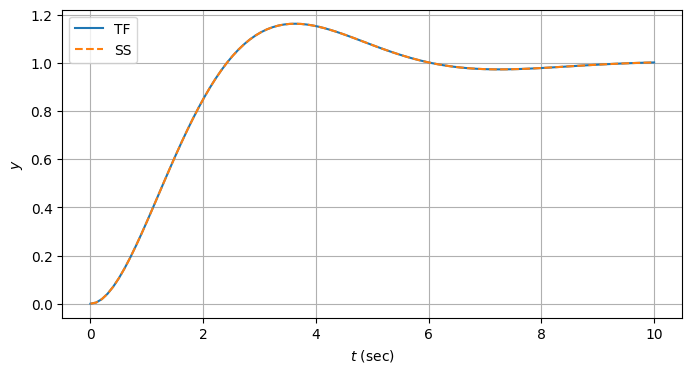

In [10]:
y_ss, t_ss = step(G_ss, t)

plt.figure(dpi=100, figsize=(8,4))
plt.plot(t_tf, y_tf, label='TF')
plt.plot(t_ss, y_ss, '--', label='SS')
plt.xlabel(r'$t$ (sec)')
plt.ylabel(r'$y$')
plt.legend()
plt.grid()
plt.show()

In fact they can go back and forth by `tf2ss` or `ss2tf`.

In [11]:
print (ss2tf(G_ss))

<TransferFunction>: sys[10]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


     1
-----------
s^2 + s + 1



In [12]:
print (tf2ss(G_tf))

<StateSpace>: sys[7]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
States (2): ['x[0]', 'x[1]']

A = [[-1. -1.]
     [ 1.  0.]]

B = [[1.]
     [0.]]

C = [[0. 1.]]

D = [[0.]]



We get the identical results by directly integrating the differential equation,

$$
  \dot{x} = Ax + Bu
$$

from the initial condition $x_0 = (0,0)$.

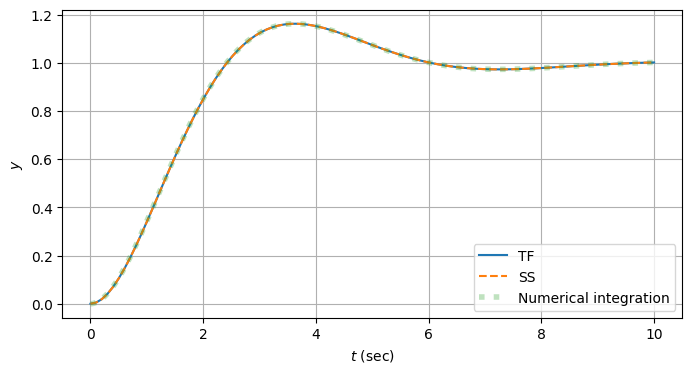

In [13]:
def model(t,z,u):
  z = z.reshape(-1,1)
  u = [[u]]
  return (A@z + B@u).flatten()

t_f = 10
dt = 0.01
t_ni = np.arange(0,t_f,dt)
T = len(t_ni)

ic = [0, 0]
state = np.zeros((2,T))
output = np.zeros(T)
input = np.ones(T)

state[:,0] = ic
deriv_p = model(t_ni[0],state[:,0],0)

for k in range(T-1):
  deriv = model(t_ni[k],state[:,k],input[k])
  state[:,k+1] = state[:,k] + dt*(3*deriv - deriv_p)/2
  output[k] = C.dot(state[:,k])
  deriv_p = deriv
output[-1] = output[-2]

plt.figure(dpi=100, figsize=(8,4))
plt.plot(t_tf, y_tf, label='TF')
plt.plot(t_ss, y_ss, '--', label='SS')
plt.plot(t_ni, output, ':', alpha = 0.3, linewidth=4, label='Numerical integration')
plt.xlabel(r'$t$ (sec)')
plt.ylabel(r'$y$')
plt.legend()
plt.grid()
plt.show()

## System interconnections

Parallel or serial connections can be intuitively computed.

In [14]:
print (f'G_1={G_1}')
print (f'G_2={G_2}')
print (f'G_1+G_2={G_1+G_2}')
print (f'G_1 G_2={G_1*G_2}')

G_1=<TransferFunction>: sys[0]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


  1
-----
s + 1

G_2=<TransferFunction>: sys[3]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


  2
-----
s + 2

G_1+G_2=<TransferFunction>: sys[12]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


   3 s + 4
-------------
s^2 + 3 s + 2

G_1 G_2=<TransferFunction>: sys[13]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


      2
-------------
s^2 + 3 s + 2



## Feedback interconnections

Feedback connections:

In [15]:
K = 2
G_f = feedback(G_1,K,-1)
G_f = (1/dcgain(G_f))*G_f
print (G_f)

<TransferFunction>: sys[17]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


  3
-----
s + 3



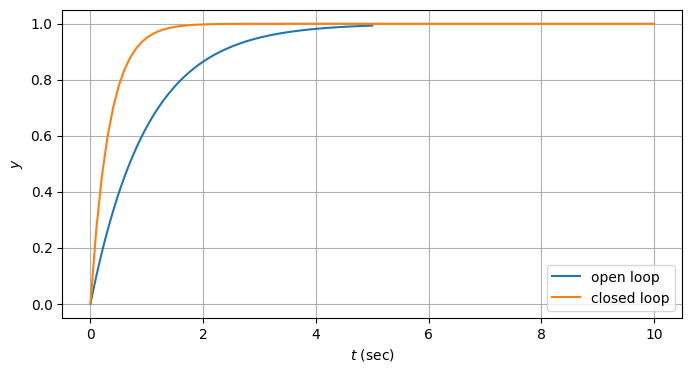

In [16]:
y_f, t_f = step(G_f, t)

plt.figure(dpi=100, figsize=(8,4))
plt.plot(t_1, y_1, label='open loop')
plt.plot(t_f, y_f, label='closed loop')
plt.xlabel(r'$t$ (sec)')
plt.ylabel(r'$y$')
plt.legend()
plt.grid()
plt.show()

## Others

## Second order systems

Second order systems.

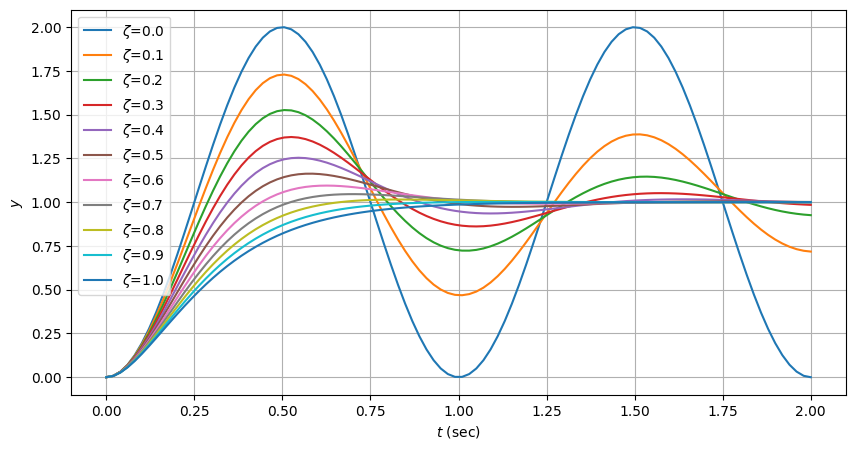

In [17]:
omega = 2*np.pi
zeta = np.linspace(0, 1, 11)
t = np.linspace(0, 2, 100)

np.set_printoptions(precision=1)
plt.figure(dpi=100, figsize=(10,5))
for z in zeta:
  num = omega**2
  den = np.array([1, 2*z*omega, omega**2])
  Gs = tf(num,den)
  ys, ts = step(Gs, t)
  plt.plot(ts, ys, label=rf'$\zeta$={z:3.1f}')
plt.xlabel(r'$t$ (sec)')
plt.ylabel(r'$y$')
plt.legend()
plt.grid()
plt.show()

A second order system with nonempty zeros.

poles at [-0.7+0.7j -0.7-0.7j]
zeros at [-1.+0.j  1.+0.j]


/usr/local/lib/python3.11/dist-packages/control/pzmap.py:318: FutureWarning: pole_zero_plot() return value of poles, zeros is deprecated; use pole_zero_map()
  warnings.warn(


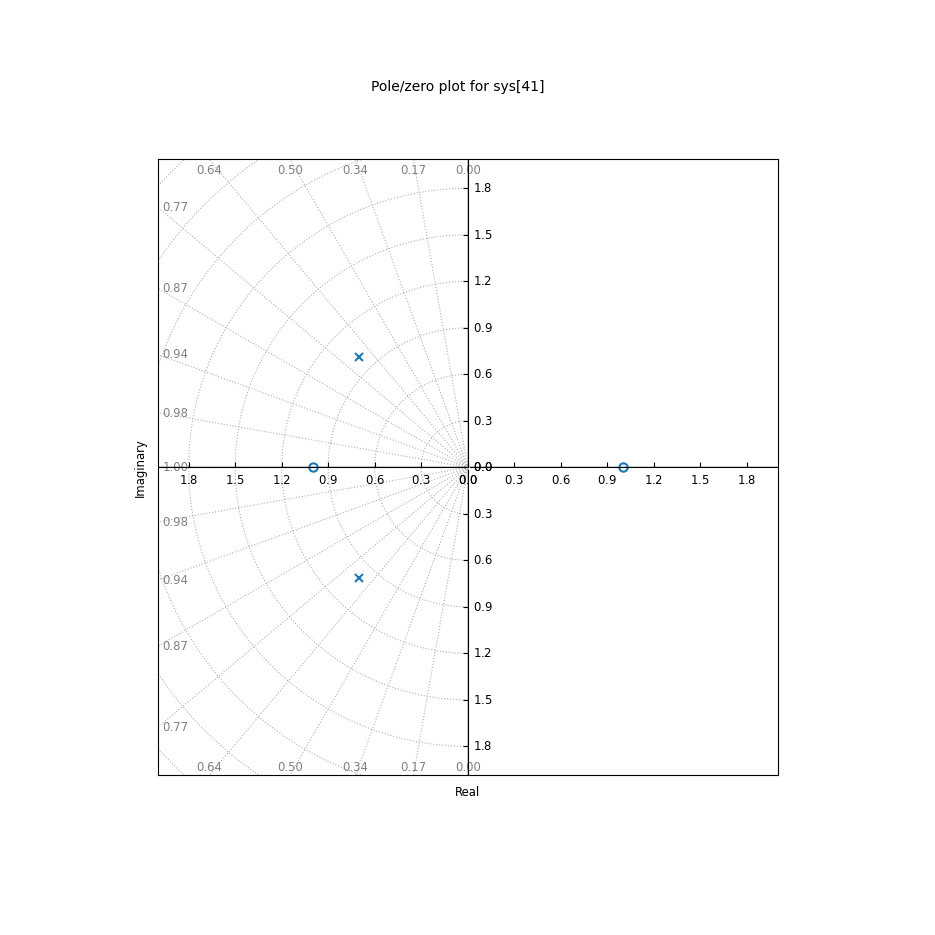

In [18]:
omega = 1
zeta = 0.7
num = np.array([1, 0, -omega**2])
den = np.array([1, 2*zeta*omega, omega**2])
Gs = tf(num,den)

print(f'poles at {pole(Gs)}')
print(f'zeros at {zero(Gs)}')

pzmap(Gs, grid=True)
fig = plt.gcf().set_size_inches(8, 8)
plt.xlim([-2,2])
plt.show()

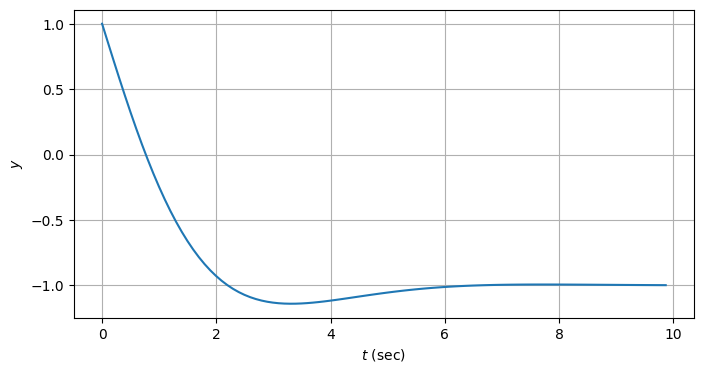

In [19]:
t = np.linspace(0, 10, 100)
yy, tt = step(Gs)
plt.figure(dpi=100, figsize=(8,4))
plt.plot(tt, yy)
plt.xlabel(r'$t$ (sec)')
plt.ylabel(r'$y$')
plt.grid()
plt.show()